# Implementing a Neural Network

In this exercise we will develop a neural network with fully-connected layers to recognize digit numbers.

In [2]:
# A bit of setup
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

from neural_net import TwoLayerNet
from gradient_check import eval_numerical_gradient

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 9.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

Load the USPS dataset from npy files.

Show an example:


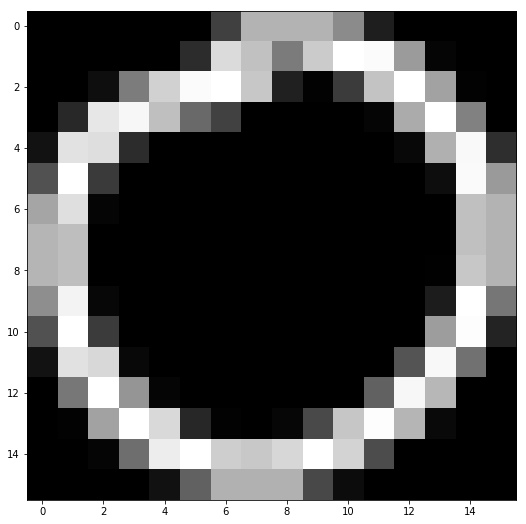

label: 0 

Train data shape:  (1000, 256)
Train labels shape:  (1000,)
Validation data shape:  (1000, 256)
Validation labels shape:  (1000,)
Test data shape:  (9000, 256)
Test labels shape:  (9000,)


In [3]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

print('Show an example:')
a0 = X_train[100,:].reshape(16,16)
plt.imshow(a0)
plt.show()
print('label:', y_train[100], '\n')

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

# A test run


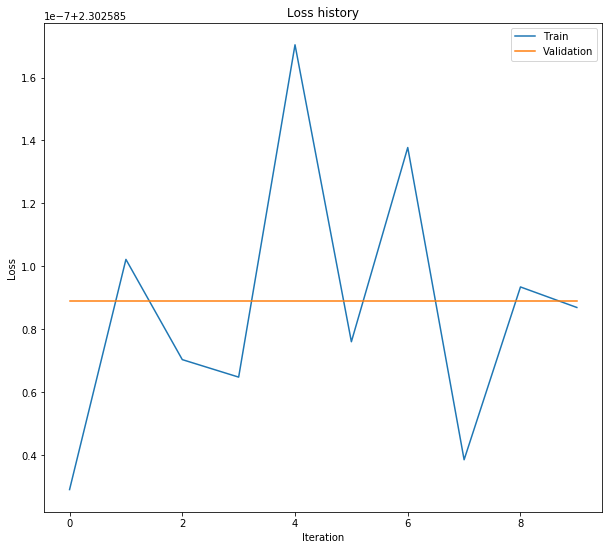

Train accuracy:  0.105
Train loss:  2.302585086647092
Validation accuracy:  0.105
Validation loss:  2.302585089016451 



In [5]:
# First, set some fixed parameters.
input_size = 256
num_classes = 10

# Now, Let's run a test run with the default parameters.
# You can see the args of train function in neural_net.py
hidden_size = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val)

# Complete gradients computation


Now, you should complete the function "loss" in neural_net.py. Complete the code to compute the gradients of W1, b1, W2 and b2. We implement numerical gradient checking for you in the following cell. If you get the gradient right, the relative error will be less than 1e-8 in the toy model. 
You can also check your own model use the function eval_numerical_gradient, but it may take longer time and result in larger error (the magnitude of 1e-2 is possible).

In [16]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

loss, grads = net.loss(X, y, wd_decay=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, wd_decay=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 1.555471e-09
b2 max relative error: 3.865091e-11


# Optimization


Now that you have got your gradients right, congratulations!
Then we could try out different optimization parameters.

iteration 0 / 140: training loss 2.302585 val loss: 2.302585
iteration 10 / 140: training loss 2.303134 val loss: 2.302586
iteration 20 / 140: training loss 2.302487 val loss: 2.302588
iteration 30 / 140: training loss 2.301891 val loss: 2.302589
iteration 40 / 140: training loss 2.303879 val loss: 2.302589
iteration 50 / 140: training loss 2.303386 val loss: 2.302589
iteration 60 / 140: training loss 2.300665 val loss: 2.302590
iteration 70 / 140: training loss 2.301605 val loss: 2.302592
iteration 80 / 140: training loss 2.300087 val loss: 2.302593
iteration 90 / 140: training loss 2.303181 val loss: 2.302598
iteration 100 / 140: training loss 2.300078 val loss: 2.302601
iteration 110 / 140: training loss 2.304413 val loss: 2.302608
iteration 120 / 140: training loss 2.301996 val loss: 2.302606
iteration 130 / 140: training loss 2.306306 val loss: 2.302609


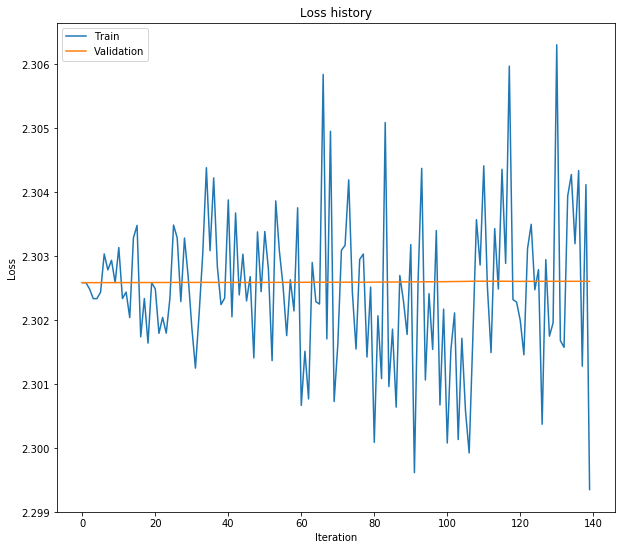

Train accuracy:  0.1
Train loss:  2.302607586335492
Validation accuracy:  0.1
Validation loss:  2.3026075929857672 



In [17]:
# An example.
input_size = 256
num_classes = 10
hidden_size = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.005, momentum=0, wd_decay=0, 
            num_iters=140, batch_size=10,
            do_early_stopping=False,
            print_every=10, verbose=True)

It's time for you to tune the parameters according to the questions in homework description. You should implement each question in the corresponding cell below.

Question 3 & 4: train with or without momentum; train with different learning rates.

In the plot you'll see that training data loss and validation data loss are both decreasing, but they're still going down steadily after those 70 optimization iterations. We could run it longer, but for now we won't. We'll see what we can do with 70 iterations. If we would run our optimization for an hour (i.e. many iterations), then when we get a bigger task and bigger network, the program might take a lot longer than an hour to do the same number of optimization iterations.

Let's try a bigger learning rate: LR=0.5, and still no momentum. You'll see that this works better.

Finding a good learning rate is important, but using momentum well can also make things work better. Without momentum, we simply add ϵ⋅−∂E∂θ to θ at every iteration, but with momentum, we use a more sophisticated strategy: we keep track of the momentum speed, using vt+1=vt⋅λ−∂E∂θ, and then we add v⋅ϵ to θ. That λ can be anything between 0 and 1, but usually 0.9 works well.

Let's try a variety of learning rates, to find out which works best. We'll try 0.002, 0.01, 0.05, 0.2, 1.0, 5.0, and 20.0. We'll try all of those both without momentum (i.e. momentum=0.0 in the program) and with momentum (i.e. momentum=0.9 in the program), so we have a total of 7 x 2 = 14 experiments to run. Remember, what we're interested in right now is the loss on the training data, because that shows how well the optimization works.

iteration 0 / 70: training loss 2.302585 val loss: 2.302585
iteration 10 / 70: training loss 7.845845 val loss: 5.347457
iteration 20 / 70: training loss 4.232478 val loss: 3.898331
iteration 30 / 70: training loss 7.760330 val loss: 5.877797
iteration 40 / 70: training loss 5.585695 val loss: 6.207605
iteration 50 / 70: training loss 5.081406 val loss: 6.422794
iteration 60 / 70: training loss 6.862144 val loss: 6.454020


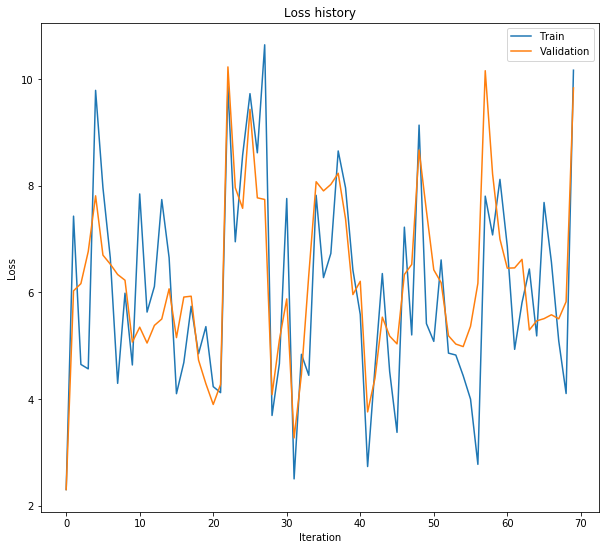

Train accuracy:  0.1
Train loss:  9.242586791649744
Validation accuracy:  0.1
Validation loss:  9.242586791649744 



In [43]:
# An example.
input_size = 256
num_classes = 10
hidden_size = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=20.0, momentum=0.9, wd_decay=0, 
            num_iters=70, batch_size=10,
            do_early_stopping=False,
            print_every=10, verbose=True)

|      | 0.002  |  0.01  |  0.05  |  0.2   |  1.0   |  5.0   |  20.0  |
| ---- | :----: | :----: | :----: | :----: | :----: | :----: | :----: |
| 0    | 2.3025 | 2.3025 | 2.3029 | 2.3052 | 2.1018 | 2.3961 | 8.5463 |
| 0.9  | 2.3025 | 2.3026 | 2.3030 | 2.3038 | 2.1944 | 2.4694 | 9.2425 |

# Generalization


Question 5: a start
We'll start with zero weight decay, 200 hidden units, 1000 optimization iterations, a learning rate of 0.35, momentum of 0.9, no early stopping, and mini-batch size 100, i.e. run a3(0, 200, 1000, 0.35, 0.9, false, 100). This run will take more time.

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 200 / 1000: training loss 0.140897 val loss: 0.303264
iteration 400 / 1000: training loss 0.091244 val loss: 0.290458
iteration 600 / 1000: training loss 0.017257 val loss: 0.317278
iteration 800 / 1000: training loss 0.014539 val loss: 0.332864


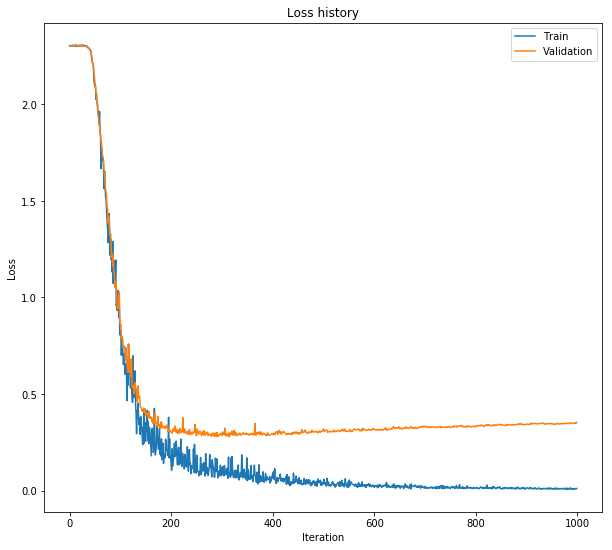

Train accuracy:  1.0
Train loss:  0.0097707901110211
Validation accuracy:  0.916
Validation loss:  0.3509781402516351 



In [45]:
input_size = 256
num_classes = 10
hidden_size = 200
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=False,
            print_every=200, verbose=True)

Question 6: Do early stopping
The simplest form of regularization is early stopping: we use the weights as they were when validation data loss was lowest. You'll see in the plot that that is not at the end of the 1000 optimization iterations, but quite a bit earlier. The script has an option for early stopping. Run the experiment with the early stopping parameter set to true. Now the generalization should be better.

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 200 / 1000: training loss 0.286985 val loss: 0.323166
iteration 400 / 1000: training loss 0.065763 val loss: 0.304228
iteration 600 / 1000: training loss 0.026163 val loss: 0.320280
iteration 800 / 1000: training loss 0.013256 val loss: 0.341262
Early stopping: validation loss was lowest after 265 iterations. We chose the model that we had then.



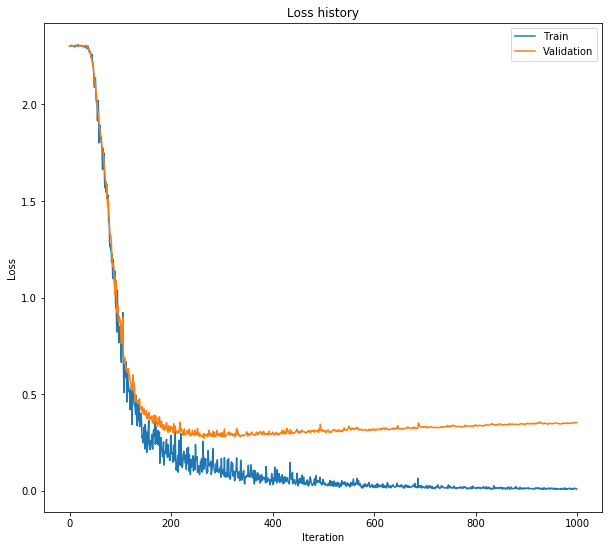

Train accuracy:  1.0
Train loss:  0.009970257366362348
Validation accuracy:  0.914
Validation loss:  0.3524253801308263 



In [46]:
input_size = 256
num_classes = 10
hidden_size = 200
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,
            print_every=200, verbose=True)

Question 7: try weight decay
Another regularization method is weight decay. Let's turn off early stopping, and instead investigate weight decay. The script has an option for L2 weight decay. As long as the coefficient is 0, in effect there is no weight decay, but let's try some different coefficients.
We've already run the experiment with WD=0. Run additional experiments with the other WD coefficients listed below, and indicate which of them gave the best generalization. Be careful to focus on the classification loss (i.e. without the weight decay loss), as opposed to the final loss (which does include the weight decay loss).

iteration 0 / 1000: training loss 2.302586 val loss: 2.302585
iteration 200 / 1000: training loss 0.224201 val loss: 0.310023
iteration 400 / 1000: training loss 0.183356 val loss: 0.283521
iteration 600 / 1000: training loss 0.174588 val loss: 0.287636
iteration 800 / 1000: training loss 0.144212 val loss: 0.294218
Early stopping: validation loss was lowest after 385 iterations. We chose the model that we had then.



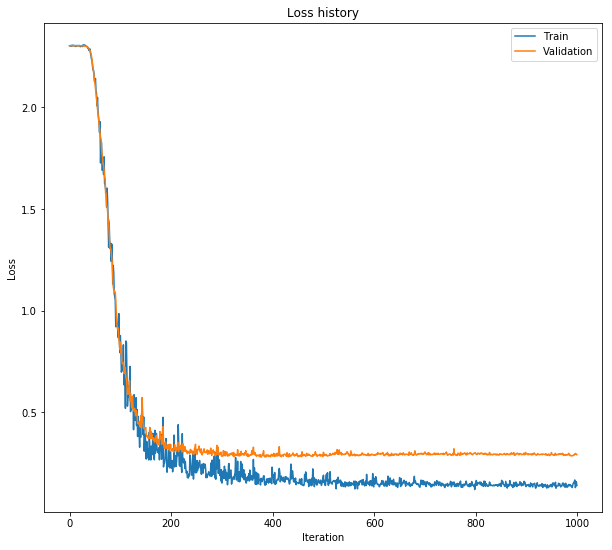

Train accuracy:  1.0
Train loss:  0.14033216768855844
Validation accuracy:  0.917
Validation loss:  0.29602858491506456 



In [55]:
input_size = 256
num_classes = 10
hidden_size = 200
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0.001, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,
            print_every=200, verbose=True)

Question 8: choose hidden layer size
Yet another regularization strategy is reducing the number of model parameters, so that the model simply doesn't have the brain capacity to overfit a lot by learning too many details of the training set. In our case, we can vary the number of hidden units. Since it's clear that our model is overfitting, we'll look into reducing the number of hidden units.

Turn off the weight decay, and instead try the following hidden layer sizes. Indicate which one worked best.

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 200 / 1000: training loss 0.105260 val loss: 0.303851
iteration 400 / 1000: training loss 0.044718 val loss: 0.292711
iteration 600 / 1000: training loss 0.017827 val loss: 0.319858
iteration 800 / 1000: training loss 0.016054 val loss: 0.337194


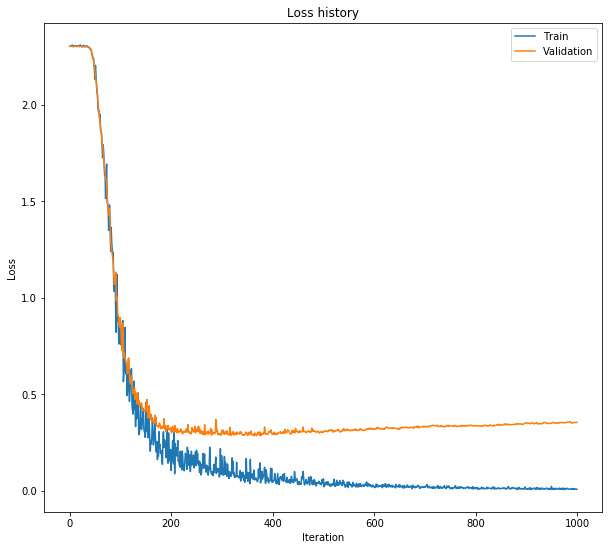

Train accuracy:  1.0
Train loss:  0.00956287844550359
Validation accuracy:  0.918
Validation loss:  0.3535846351015159 



In [62]:
input_size = 256
num_classes = 10
hidden_size = 200
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=False,
            print_every=200, verbose=True)

Question 9: choose hidden layer size with early stopping
Most regularization methods can be combined quite well. Let's combine early stopping with a carefully chosen hidden layer size. Which number of hidden units works best that way, i.e. with early stopping? Remember, best, here, is based on only the validation data loss.

iteration 0 / 1000: training loss 2.302585 val loss: 2.302585
iteration 100 / 1000: training loss 0.797812 val loss: 0.804912
iteration 200 / 1000: training loss 0.142694 val loss: 0.330942
iteration 300 / 1000: training loss 0.105434 val loss: 0.299901
iteration 400 / 1000: training loss 0.044728 val loss: 0.299124
iteration 500 / 1000: training loss 0.022057 val loss: 0.308144
iteration 600 / 1000: training loss 0.060192 val loss: 0.316944
iteration 700 / 1000: training loss 0.014789 val loss: 0.331578
iteration 800 / 1000: training loss 0.020034 val loss: 0.342689
iteration 900 / 1000: training loss 0.009693 val loss: 0.344451
Early stopping: validation loss was lowest after 303 iterations. We chose the model that we had then.



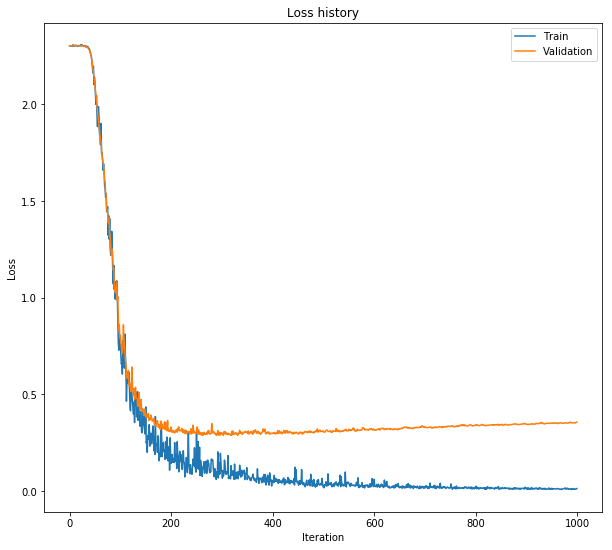

Train accuracy:  1.0
Train loss:  0.009792115583262949
Validation accuracy:  0.913
Validation loss:  0.3555868641861906 



In [66]:
input_size = 256
num_classes = 10
hidden_size = 236
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0, 
            num_iters=1000, batch_size=100,
            do_early_stopping=True,
            print_every=100, verbose=True)

Question 10: 
Of course, we could explore a lot more, such as maybe combining all 3 regularization methods, and that might work a little better. If you want to, you can play with the code all you want. You could even try to modify it to have 2 hidden layers, to add dropout, or anything else. The code is a reasonably well-written starting point for Neural Network experimentation. All of that, however, is beyond the scope of this assignment; here, we have only one question left.

Now that we've quite carefully established a good optimization strategy as well as a good regularization strategy, it's time to see how well our model does on the task that we really cared about: reading handwritten digits.
For the settings that you chose on the previous question, what is the test data classification error rate?

iteration 0 / 400: training loss 2.302586 val loss: 2.302585
iteration 100 / 400: training loss 0.947289 val loss: 0.930187
iteration 200 / 400: training loss 0.308548 val loss: 0.326577
iteration 300 / 400: training loss 0.186186 val loss: 0.280156
Early stopping: validation loss was lowest after 308 iterations. We chose the model that we had then.



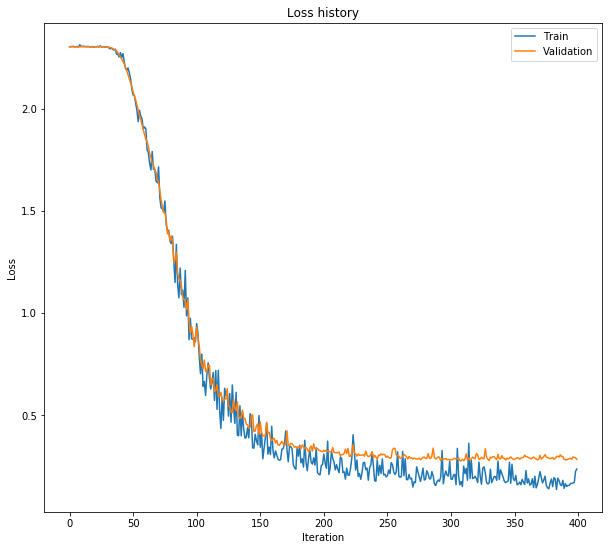

Train accuracy:  0.986
Train loss:  0.17731084707805955
Validation accuracy:  0.916
Validation loss:  0.2870226502792514 

match: 8250/9000


In [73]:
input_size = 256
num_classes = 10
hidden_size = 236
net = TwoLayerNet(input_size, hidden_size, num_classes)

stats = net.train(X_train, y_train, X_val, y_val,
            learning_rate=0.35, momentum=0.9, wd_decay=0.001, 
            num_iters=400, batch_size=100,
            do_early_stopping=True,
            print_every=100, verbose=True)
y_pred=net.predict(X_test)
print('match: {0}/{1}'.format(np.sum(np.equal(y_pred,y_test)),y_test.shape[0]))